In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

import understatapi

client = understatapi.UnderstatClient()

In [ ]:
df = pd.read_csv('erling_haaland_2022_understat.csv')


In [ ]:
df.head()

[{'id': '63920',
  'minute': '30',
  'result': 'Goal',
  'X': '0.9569999694824218',
  'Y': '0.4379999923706055',
  'xG': '0.5836790204048157',
  'player': 'Ousmane Dembélé',
  'h_a': 'h',
  'player_id': '3226',
  'situation': 'OpenPlay',
  'season': '2015',
  'shotType': 'RightFoot',
  'match_id': '2007',
  'h_team': 'Rennes',
  'a_team': 'Bordeaux',
  'h_goals': '2',
  'a_goals': '2',
  'date': '2015-11-22 20:00:00',
  'player_assisted': 'Paul-Georges Ntep',
  'lastAction': 'Pass'},
 {'id': '65015',
  'minute': '8',
  'result': 'BlockedShot',
  'X': '0.7180000305175781',
  'Y': '0.40299999237060546',
  'xG': '0.043768901377916336',
  'player': 'Ousmane Dembélé',
  'h_a': 'h',
  'player_id': '3226',
  'situation': 'DirectFreekick',
  'season': '2015',
  'shotType': 'RightFoot',
  'match_id': '2028',
  'h_team': 'Rennes',
  'a_team': 'Marseille',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2015-12-04 00:00:00',
  'player_assisted': None,
  'lastAction': 'Standard'},
 {'id': '65019',


In [5]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [8]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df["X"].mean()
actual_average_distance = 120 - (df["X"]*1.2).mean()


In [10]:
print(actual_average_distance)

11.720000401938833


In [ ]:
background_color ="#0C0D0E"

In [12]:
import matplotlib.font_manager as font_manager
font_path = "Arvo-Regular.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

Text(0.63, 0, ' 0.27')

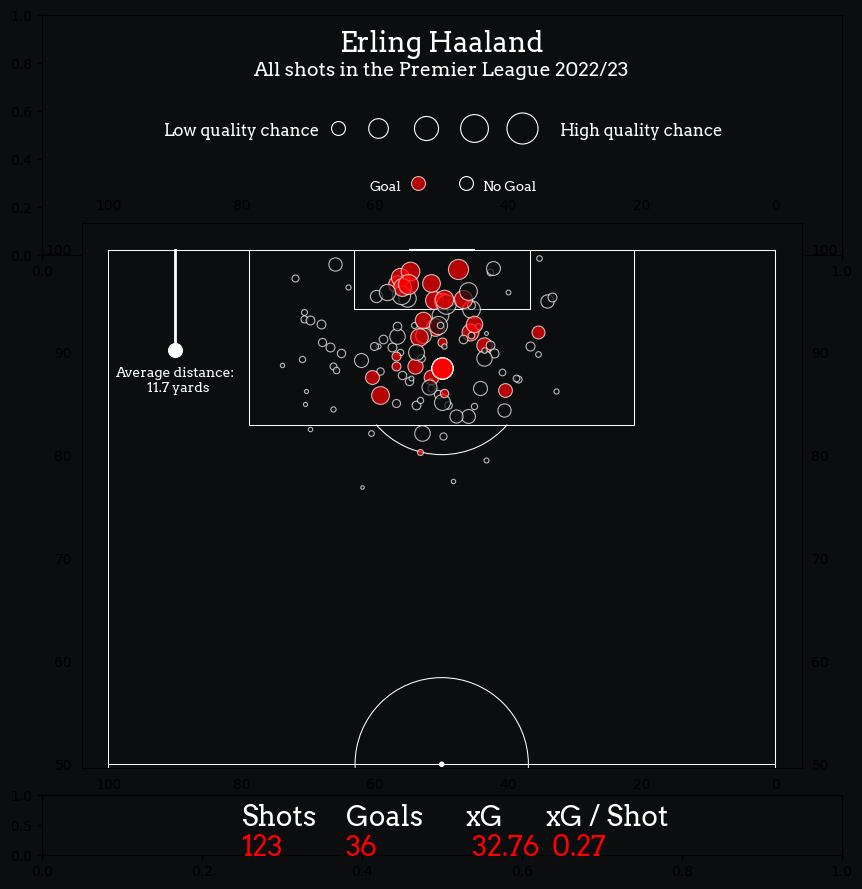

In [35]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)


# Creation of the first section : Name, description, and legend
ax1 = fig.add_axes([0,.7,1,.2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x=.5,
    y=.85,
    s = "Erling Haaland",
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color="white",
    ha='center',
)

ax1.text(
    x=.5,
    y=.75,
    s = "All shots in the Premier League 2022/23",
    fontsize=14,
    fontproperties=font_prop,
    color="white",
    ha='center',
)

ax1.text(
    x=.25,
    y=.5,
    s = "Low quality chance",
    fontsize=12,
    fontproperties=font_prop,
    color="white",
    ha='center',
)

ax1.text(
    x=.75,
    y=.5,
    s = "High quality chance",
    fontsize=12,
    fontproperties=font_prop,
    color="white",
    ha='center',
)

ax1.scatter(
    x= .37,
    y=.53,
    s=100,
    color = background_color,
    edgecolor = "white",
    linewidth=.8,
)
ax1.scatter(
    x= .42,
    y=.53,
    s=200,
    color = background_color,
    edgecolor = "white",
    linewidth=.8,
)
ax1.scatter(
    x= .48,
    y=.53,
    s=300,
    color = background_color,
    edgecolor = "white",
    linewidth=.8,
)
ax1.scatter(
    x= .54,
    y=.53,
    s=400,
    color = background_color,
    edgecolor = "white",
    linewidth=.8,
)
ax1.scatter(
    x= .6,
    y=.53,
    s=500,
    color = background_color,
    edgecolor = "white",
    linewidth=.8,
)
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_prop, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)


ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_prop, 
    color='white', 
    ha='left'
)



# Creation of the second section : The pitch
ax2 = fig.add_axes([.05,.25,.9,.5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type = 'opta',
    half = True,
    pitch_color = background_color,
    pad_bottom = .5,
    line_color = 'white',
    linewidth = .75,
    axis=True,
    label = True
)

pitch.draw(ax=ax2)

ax2.scatter(x=90, y=points_average_distance, s=100, color = 'white', linewidth = .8)
ax2.plot([90,90], [100, points_average_distance],color = 'white', linewidth = 2)
ax2.text(
    x=90, 
    y = points_average_distance - 4,
    s=f'Average distance:\n {actual_average_distance : .1f} yards', 
    fontsize=10, 
    fontproperties=font_prop, 
    color='white', 
    ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=x['xG'] * 300,
        color = 'red' if x['result'] == 'Goal' else background_color,
        ax = ax2,
        alpha = .7,
        linewidth = .8,
        edgecolor = 'white'
    )

# Creation of the third section : Key Statistics
ax3 = fig.add_axes([0,.2,1,.05])
ax3.set_facecolor(background_color)

ax3.text(x=.25, y=.5, s='Shots', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='white', ha='left')
ax3.text(x=.25, y=0, s=f'{total_shots}', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='red', ha='left')

ax3.text(x=.38, y=.5, s='Goals', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='white', ha='left')
ax3.text(x=.38, y=0, s=f'{total_goals}', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='red', ha='left')


ax3.text(x=.53, y=.5, s='xG', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='white', ha='left')
ax3.text(x=.53, y=0, s=f'{total_xG: .2f}', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='red', ha='left')

ax3.text(x=.63, y=.5, s='xG / Shot', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='white', ha='left')
ax3.text(x=.63, y=0, s=f'{xG_per_shot : .2f}', fontsize = 20, fontproperties=font_prop, fontweight='bold', color='red', ha='left')
